In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from cmapPy.pandasGEXpress.parse import parse

## TODO 
1. Find common conversions cell line names. GDSC, DEPMAP_ID, CCLE (link)[https://depmap.org/portal/cell_line/ACH-002270?tab=mutation] show at the top some examples)

# Target data, drug response metric.
GDSC IC50, DEPMAP GI50, any other response datasets we can add?

Row = Cell line
Cols = Drug
meta = dose, timing, metric

First we'll look at the GDSC. Downloaded from GDSC originally, but it seems that DEPMAP has a formatted one. Will start with theirs for now.

In [2]:
gdsc_viability= pd.read_csv('data/depmap_data/sanger-dose-response.csv')

In [3]:
gdsc_viability.head()

,DATASET,COSMIC_ID,DRUG_ID,MIN_CONC,MAX_CONC,RMSE_PUBLISHED,Z_SCORE_PUBLISHED,IC50_PUBLISHED,AUC_PUBLISHED,ARXSPAN_ID,DRUG_NAME,BROAD_ID,upper_limit,ec50,slope,lower_limit,auc,log2.ic50,mse,R2
0,GDSC1,683665,1,0.007813,2.0,0.022518,-0.192056,10.977393,0.982116,ACH-002270,ERLOTINIB,BRD-K70401845,0.992788,2.839376,-5.670993,0.514389,0.990834,NaN,0.000034,0.904675
1,GDSC1,684055,1,0.007813,2.0,0.031831,0.505823,23.133991,0.984820,ACH-002104,ERLOTINIB,BRD-K70401845,1.006405,0.028649,-0.186377,0.990054,0.997138,NaN,0.000057,0.028903
2,GDSC1,684057,1,0.007813,2.0,0.026047,1.280750,52.935278,0.985696,ACH-002106,ERLOTINIB,BRD-K70401845,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GDSC1,684059,1,0.007813,2.0,0.110056,0.086028,14.774223,0.972701,ACH-002108,ERLOTINIB,BRD-K70401845,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,GDSC1,684062,1,0.007813,2.0,0.087010,-0.114395,11.926884,0.944463,ACH-002111,ERLOTINIB,BRD-K70401845,0.989580,0.075804,-12.222777,0.894027,0.933185,NaN,0.000623,0.777093


In [7]:
gdsc_df = gdsc_viability.pivot_table(
    index='ARXSPAN_ID',
    columns='DRUG_NAME',
    values='IC50_PUBLISHED'
).copy()
# gdsc_df.droplevel('DRUG_NAME', axis=1)

In [8]:
gdsc_df.head(5)

DRUG_NAME,(5Z)-7-OXOZEAENOL,5-FLUOROURACIL,681640,"A-443654, KIN001-139","A-770041, KIN001-111",A-83-01,ABT-737,"ACETALAX, OXYPHENISATIN ACETATE",ACY-1215,AFATINIB,...,Y-39983,YK-4-279,YM-155,YM-201636,"Z-LLNLE-CHO, Z-L-NORLEUCINE-CHO",ZG-10,ZIBOTENTAN,ZM-447439,"ZOLEDRONATE, ZOLEDRONIC ACID, ZOMETA, RECLAST",ZSTK-474
ARXSPAN_ID,,,,,,,,,,,,,,,,,,,,,
ACH-000001,4.616584,418.294185,5.213697,NaN,NaN,64.009787,19.111591,0.411379,3.692867,15.528198,...,317.392126,3.217641,26.782302,88.779521,NaN,1.746451,313.403657,6.240417,94.852590,15.286804
ACH-000002,4.164974,13.475675,3.598997,1.317619,9.453481,75.007867,0.059276,138.574904,1.793663,31.895294,...,23.825180,4.150511,0.003929,7.808134,2.093187,NaN,189.479151,2.543795,22.921332,0.392292
ACH-000004,2.581844,13.198461,1.019421,0.428357,12.294660,85.041043,NaN,272.503648,2.184450,15.873966,...,47.015531,3.468957,0.147151,2.812743,0.771237,NaN,75.906324,6.539168,15.576790,1.548948
ACH-000006,0.055487,1.741805,2.667695,0.113824,29.213064,64.082095,0.657527,NaN,2.381513,9.575032,...,15.650299,3.079992,0.009622,3.265546,1.230248,NaN,179.570340,4.724643,NaN,0.309564
ACH-000007,0.989196,3.993423,9.282232,3.275292,33.195821,55.518817,NaN,222.434794,15.632108,27.688097,...,50.353544,6.091668,1.443373,3.181742,1.334875,9.886261,305.774224,5.496453,96.491508,2.494477


In [92]:
gdsc_df.describe()

DRUG_NAME,(5Z)-7-OXOZEAENOL,5-FLUOROURACIL,681640,"A-443654, KIN001-139","A-770041, KIN001-111",A-83-01,ABT-737,"ACETALAX, OXYPHENISATIN ACETATE",ACY-1215,AFATINIB,...,Y-39983,YK-4-279,YM-155,YM-201636,"Z-LLNLE-CHO, Z-L-NORLEUCINE-CHO",ZG-10,ZIBOTENTAN,ZM-447439,"ZOLEDRONATE, ZOLEDRONIC ACID, ZOMETA, RECLAST",ZSTK-474
count,899.000000,947.000000,917.000000,389.000000,389.000000,896.000000,737.000000,715.000000,907.000000,951.000000,...,901.000000,905.000000,928.000000,902.000000,389.000000,488.000000,902.000000,935.000000,715.000000,902.000000
mean,6.601007,451.166944,47.241294,1.691052,22.063897,87.218638,31.453604,510.448871,15.819337,28.573213,...,144.921331,60.527544,1.113238,20.843598,6.582391,12.131677,272.870629,21.438537,109.057158,8.520050
std,22.205383,1596.524126,359.658953,4.217942,27.737313,85.630855,70.267648,1045.748071,47.445398,40.331991,...,161.978193,364.018948,6.750371,32.624412,18.228969,31.889503,148.786629,83.019291,194.308940,19.730531
min,0.008862,0.203390,0.051588,0.024961,0.006077,2.074433,0.004968,0.041955,0.298400,0.018112,...,0.209979,0.394640,0.000692,0.217106,0.299227,0.171480,5.663284,0.265254,0.807795,0.008292
25%,1.094078,26.706063,3.871133,0.190446,2.650059,39.320172,2.333544,37.403191,2.272697,7.654607,...,30.442602,2.643897,0.004948,3.962117,0.898940,2.038719,176.357802,3.882509,25.049117,0.794788
50%,2.545115,97.574014,8.049295,0.384838,11.007931,59.248189,10.407607,161.695349,5.388171,18.629322,...,91.866368,7.040339,0.014436,9.167311,1.534918,3.816547,243.111469,8.604951,54.997020,2.415679
75%,4.977185,300.164075,21.130321,1.103640,29.892332,102.069201,30.769994,505.254115,11.993259,36.456035,...,202.508123,26.335188,0.067077,21.907565,4.706441,7.718130,337.754755,20.401485,109.970040,6.903604
max,364.487406,23372.806234,10224.327906,46.363847,155.789853,921.914052,1169.988268,9261.719486,782.736411,625.183397,...,1470.643001,7792.076878,87.591938,368.939251,272.488115,328.479358,1414.724371,2384.732354,1896.163664,256.389046


A few notes. Counts for each drug vary
We see large ranges for IC50 (5-FLUOROURACIL min-max = (.2, 23372.))
We saw nans above, see count (number of non-nans) ranges

In [13]:
gdsc_df.count().sort_values().tail(20)

DRUG_NAME
GDC-0941          947
5-FLUOROURACIL    947
GEFITINIB         948
VINBLASTINE       948
PLX-4720          949
CISPLATIN         949
NILOTINIB         949
AZD7762           949
VORINOSTAT        949
DOCETAXEL         950
OLAPARIB          950
AFATINIB          951
BICALUTAMIDE      953
AZD6482           955
JQ1               957
CHIR-99021        958
UNC0638           958
BMS-536924        958
SB 505124         959
AVAGACESTAT       960
dtype: int64

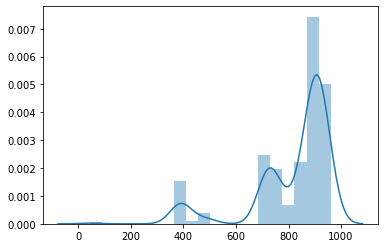

In [10]:
sns.distplot(gdsc_df.count());

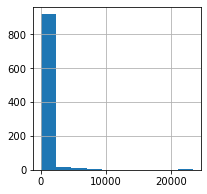

In [14]:
gdsc_df['5-FLUOROURACIL'].hist(figsize=(3, 3));

Log2 transform will move make distributions normal. Also will think about filtering our data down to only keep drugs to where there are enough cell lines.

In [15]:
gdsc_df_log2 = gdsc_df.apply(np.log2)

In [16]:
gdsc_df.shape

(973, 397)

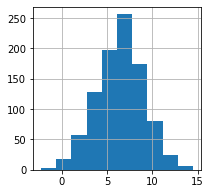

In [30]:
# log2 normalize IC50
gdsc_df_log2['5-FLUOROURACIL'].hist(figsize=(3, 3));

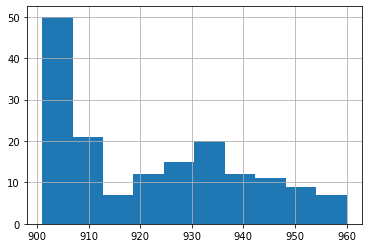

In [31]:
gdsc_df_log2.count().hist();

In [19]:
at_least_500 = gdsc_df_log2.count()[gdsc_df_log2.count() > 900].index.values

In [23]:
gdsc_df_log2 = gdsc_df_log2[at_least_500].copy()

In [36]:
gdsc_df_log2.T.count().sort_values()

ARXSPAN_ID
ACH-002173      0
ACH-002098      1
ACH-000345      1
ACH-002112      2
ACH-002286      2
             ... 
ACH-000665    164
ACH-000666    164
ACH-000667    164
ACH-000669    164
ACH-002317    164
Length: 973, dtype: int64

In [38]:
in_cl = gdsc_df_log2.T.count()[gdsc_df_log2.T.count()== 164].index.values

DRUG_NAME,5-FLUOROURACIL,681640,ACY-1215,AFATINIB,AGI-6780,"AICAR, N1-(B-D-RIBOFURANOSYL)-5-AMINOIMIDAZOLE-4-CARBOXAMIDE","AKT INHIBITOR VIII, KIN001-102",ALECTINIB,ALISERTIB,AT7867,...,XMD13-2,XMD14-99,XMD15-27,Y-39983,YK-4-279,YM-155,YM-201636,ZIBOTENTAN,ZM-447439,ZSTK-474
ARXSPAN_ID,,,,,,,,,,,,,,,,,,,,,
ACH-000001,8.708374,2.382307,1.884741,3.956819,5.925946,13.591551,6.609770,6.602557,5.590682,8.568342,...,7.602557,7.602557,7.602557,8.310123,1.686004,4.743208,6.472155,8.291878,2.641642,3.934215
ACH-000002,3.752286,1.847595,0.842909,4.995272,3.530123,8.337930,3.470180,5.604090,-1.738329,3.269697,...,3.197338,5.795066,6.403631,4.574415,2.053289,-7.991606,2.964978,7.565895,1.346982,-1.350000
ACH-000004,3.722298,0.027750,1.127270,3.988591,3.725387,9.636803,3.147753,4.063931,2.935874,4.303419,...,2.854024,3.748452,5.229342,5.555066,1.794502,-2.764631,1.491978,6.246148,2.709107,0.631289
ACH-000006,0.800583,1.415594,1.251878,3.259277,0.790386,8.456641,0.649292,4.879193,1.153530,3.232539,...,3.144521,3.330343,5.538971,3.968118,1.622927,-6.699436,1.707324,7.488405,2.240205,-1.691693
ACH-000007,1.997626,3.214472,3.966440,4.791194,5.561955,12.163376,3.398535,6.409189,0.524864,4.407495,...,3.964272,6.747873,6.848994,5.654021,2.606837,0.529445,1.669817,8.256323,2.458501,1.318737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-002312,9.242798,4.083709,3.579582,1.054378,5.327757,9.777926,3.297483,5.420201,1.691209,4.213832,...,7.123191,6.277378,7.123191,6.928096,2.721603,0.230366,2.607125,7.872247,3.594248,0.145069
ACH-002313,4.758284,2.022760,1.383697,4.265368,3.274334,8.859530,2.228703,4.786862,1.118999,3.963816,...,3.257833,6.100309,6.569921,4.281462,1.023710,-3.697813,1.692369,7.458373,3.754546,-1.152695
ACH-002314,1.910599,2.117329,0.678160,3.379081,3.576171,9.263265,3.085849,5.237616,2.784266,3.623308,...,2.293806,4.501294,7.026899,4.465366,-0.330287,-3.750398,1.434381,7.220934,2.174232,-1.206933


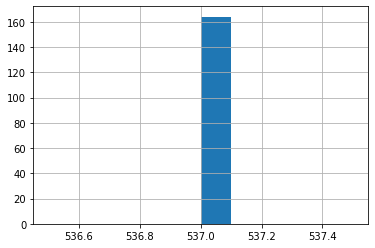

In [42]:
gdsc_df_log2.loc[in_cl].count().hist();

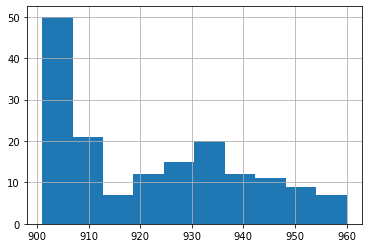

In [45]:
gdsc_df_log2.count().hist();

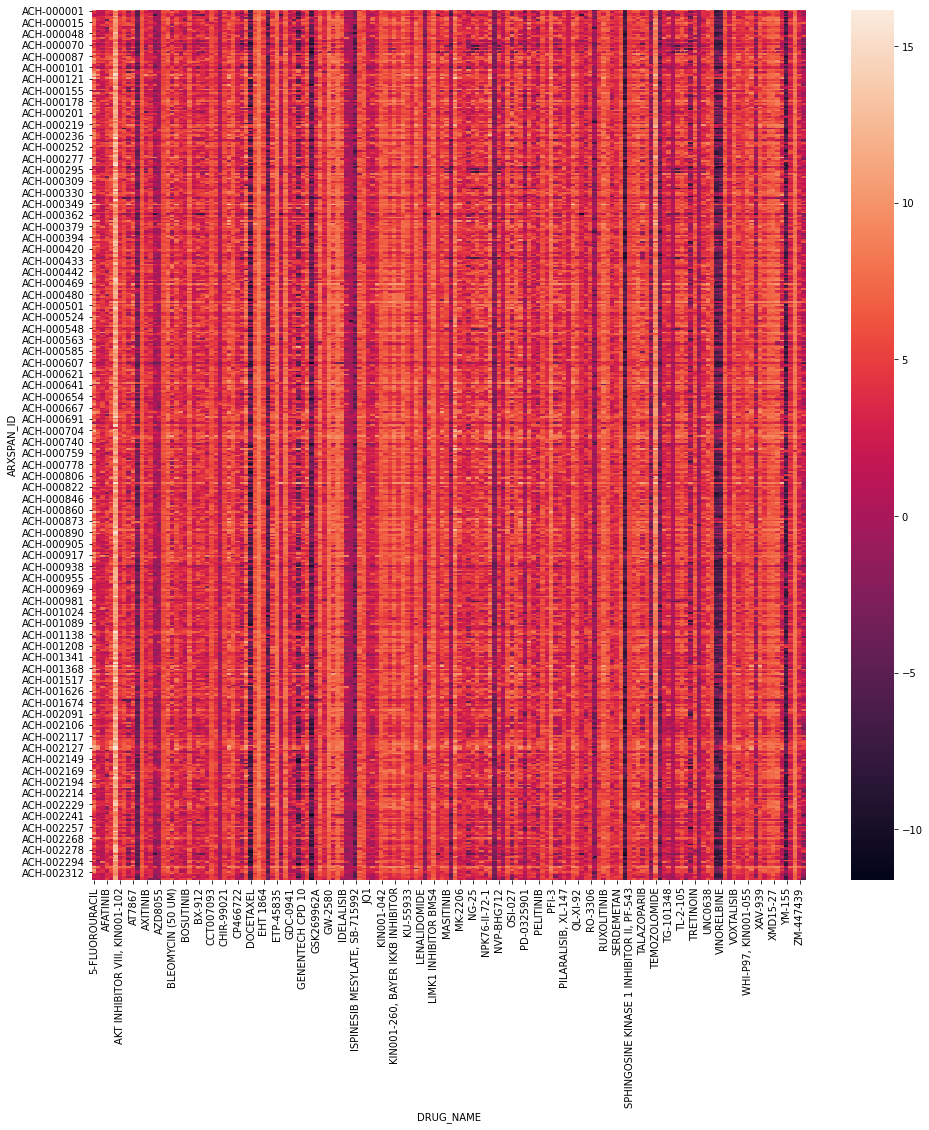

In [44]:
fig = plt.figure(figsize=(16, 16))
ax = fig.add_subplot(111)
sns.heatmap(gdsc_df_log2.loc[in_cl], ax=ax);

In [54]:
ic50 = gdsc_df_log2.loc[in_cl].copy()
ic50.head()

DRUG_NAME,5-FLUOROURACIL,681640,ACY-1215,AFATINIB,AGI-6780,"AICAR, N1-(B-D-RIBOFURANOSYL)-5-AMINOIMIDAZOLE-4-CARBOXAMIDE","AKT INHIBITOR VIII, KIN001-102",ALECTINIB,ALISERTIB,AT7867,...,XMD13-2,XMD14-99,XMD15-27,Y-39983,YK-4-279,YM-155,YM-201636,ZIBOTENTAN,ZM-447439,ZSTK-474
ARXSPAN_ID,,,,,,,,,,,,,,,,,,,,,
ACH-000001,8.708374,2.382307,1.884741,3.956819,5.925946,13.591551,6.609770,6.602557,5.590682,8.568342,...,7.602557,7.602557,7.602557,8.310123,1.686004,4.743208,6.472155,8.291878,2.641642,3.934215
ACH-000002,3.752286,1.847595,0.842909,4.995272,3.530123,8.337930,3.470180,5.604090,-1.738329,3.269697,...,3.197338,5.795066,6.403631,4.574415,2.053289,-7.991606,2.964978,7.565895,1.346982,-1.350000
ACH-000004,3.722298,0.027750,1.127270,3.988591,3.725387,9.636803,3.147753,4.063931,2.935874,4.303419,...,2.854024,3.748452,5.229342,5.555066,1.794502,-2.764631,1.491978,6.246148,2.709107,0.631289
ACH-000006,0.800583,1.415594,1.251878,3.259277,0.790386,8.456641,0.649292,4.879193,1.153530,3.232539,...,3.144521,3.330343,5.538971,3.968118,1.622927,-6.699436,1.707324,7.488405,2.240205,-1.691693
ACH-000007,1.997626,3.214472,3.966440,4.791194,5.561955,12.163376,3.398535,6.409189,0.524864,4.407495,...,3.964272,6.747873,6.848994,5.654021,2.606837,0.529445,1.669817,8.256323,2.458501,1.318737


# Feature data

Gene expression by cell line. 

In [60]:
# load from CCLE RPKM

# https://data.broadinstitute.org/ccle/CCLE_RNAseq_genes_rpkm_20180929.gct


expression = pd.read_csv('data/depmap_data/CCLE_expression.csv')

expression.head(5)

,Unnamed: 0,TSPAN6 (7105),TNMD (64102),DPM1 (8813),SCYL3 (57147),C1orf112 (55732),FGR (2268),CFH (3075),FUCA2 (2519),GCLC (2729),...,ARHGAP11B (89839),AC004593.2 (1124),AC090517.4 (54816),AL160269.1 (11046),ABCF2-H2BE1 (114483834),POLR2J3 (548644),H2BE1 (114483833),AL445238.1 (647264),GET1-SH3BGR (106865373),AC113348.1 (102724657)
0,ACH-001113,4.990501,0.000000,7.273702,2.765535,4.480265,0.028569,1.269033,3.058316,6.483171,...,1.214125,0.000000,0.111031,0.150560,1.427606,5.781884,0.0,0.000000,0.799087,0.000000
1,ACH-001289,5.209843,0.545968,7.070604,2.538538,3.510962,0.000000,0.176323,3.836934,4.200850,...,1.835924,0.000000,0.310340,0.000000,0.807355,4.704319,0.0,0.000000,0.464668,0.070389
2,ACH-001339,3.779260,0.000000,7.346425,2.339137,4.254745,0.056584,1.339137,6.724241,3.671293,...,1.823749,0.084064,0.176323,0.042644,1.384050,4.931683,0.0,0.028569,0.263034,0.000000
3,ACH-001538,5.726831,0.000000,7.086189,2.543496,3.102658,0.000000,5.914565,6.099716,4.475733,...,0.871844,0.137504,0.263034,2.485427,0.713696,3.858976,0.0,0.000000,0.000000,0.000000
4,ACH-000242,7.465648,0.000000,6.435462,2.414136,3.864929,0.831877,7.198003,5.452530,7.112492,...,2.324811,0.163499,0.163499,0.000000,1.117695,4.990501,0.0,0.000000,0.000000,0.000000


In [61]:
expression.rename(mapper={'Unnamed: 0': 'cell_line'}, axis=1, inplace=True)
expression.set_index('cell_line', inplace=True)
expression.rename({i: i.split(' (')[0] for i in expression.columns.values}, axis=1, inplace=True)
expression.head(5)

In [71]:
gene_names = expression.columns.values

In [79]:
with open('gene_names.txt', 'w') as f:
    for i in gene_names:
        f.write(f'{i}\n')
        

In [80]:
with open('drug_names.txt', 'w') as f:
    for i in ic50.columns.values:
        f.write(f'{i}\n')

In [64]:
expression.sort_index().head(5)[sorted(expression.columns.values)]

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
cell_line,,,,,,,,,,,,,,,,,,,,,
ACH-000001,3.122673,0.056584,0.250962,0.111031,0.000000,1.035624,0.176323,5.845741,4.125155,0.815575,...,5.049631,6.695715,0.948601,1.839960,4.696550,3.273516,2.811471,6.825786,3.005400,4.710393
ACH-000002,1.416840,0.000000,0.286881,0.111031,0.000000,0.150560,0.000000,5.221877,1.967169,0.000000,...,3.176323,6.398487,0.056584,0.963474,3.951401,0.000000,1.090853,6.019924,2.195348,3.363171
ACH-000003,1.400538,4.335569,0.321928,0.150560,0.000000,4.207893,0.097611,5.332350,3.931683,1.827819,...,3.931683,7.555049,0.443607,1.475085,2.841973,0.695994,2.321928,7.326340,2.643856,2.961623
ACH-000004,4.180307,0.000000,0.286881,0.344828,0.070389,0.097611,0.000000,6.430620,3.212569,0.000000,...,4.242603,6.119356,0.765535,1.545968,3.617063,0.014355,2.070389,7.036503,3.436961,5.269407
ACH-000005,4.023255,0.014355,0.226509,0.014355,0.000000,0.028569,0.000000,6.397461,3.773996,0.000000,...,5.603181,6.825531,0.765535,1.704872,3.775051,0.014355,2.797013,6.863319,3.524816,5.982994


In [65]:
merged = expression.join(ic50, how='inner')
merged.head(5)

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,XMD13-2,XMD14-99,XMD15-27,Y-39983,YK-4-279,YM-155,YM-201636,ZIBOTENTAN,ZM-447439,ZSTK-474
ACH-000327,4.032982,0.000000,5.806582,1.948601,2.684819,0.014355,3.117695,5.977509,3.653060,3.014355,...,5.283498,7.797708,8.524090,6.085682,3.121581,-3.025868,2.886934,9.326550,5.209477,0.893083
ACH-001655,4.376429,0.000000,6.679480,0.925999,1.867896,0.042644,0.056584,5.394034,1.839960,2.634593,...,5.239939,5.499001,5.201661,4.648675,4.987007,-8.559498,2.319721,8.268030,1.504607,0.427913
ACH-000351,4.614121,0.000000,8.070443,2.356144,4.105175,1.641546,0.344828,6.004501,4.624686,4.126808,...,5.232326,6.504662,7.030029,6.010237,4.067001,-8.304451,3.963981,8.194534,2.768145,0.940877
ACH-000769,5.419202,0.000000,6.109152,2.446256,4.191405,0.000000,0.097611,5.732269,5.750874,4.015248,...,2.955613,5.624791,7.249048,4.375603,1.483945,-3.580601,2.008383,8.249952,0.376308,2.782170
ACH-000421,5.257011,0.333424,6.924219,2.965323,4.761817,0.189034,0.250962,6.909053,5.875043,4.070389,...,5.733052,8.330667,8.334422,9.284757,4.864656,-5.254027,5.158547,9.290895,4.119593,0.661807


In [69]:
print(len(merged.index.values))
print(len(set(merged.index.values)))

401
401


In [66]:
merged.isnull().sum()

TSPAN6        0
TNMD          0
DPM1          0
SCYL3         0
C1orf112      0
             ..
YM-155        0
YM-201636     0
ZIBOTENTAN    0
ZM-447439     0
ZSTK-474      0
Length: 19341, dtype: int64

In [70]:
merged.to_hdf('merged_depmap.h5', key='df', mode='w')

In [96]:
merged = pd.read_hdf('merged_depmap.h5', 'df')